In [1]:
# import torch
from tool.darknet2pytorch import Darknet
import cv2
import matplotlib.pyplot as plt

In [2]:
cfgfile = './../cfg/yolov4.cfg'
weights = './../weights/yolov4.weights'

# Model load from Darknet cfg and weights

In [3]:
m = Darknet(cfgfile)
m.load_weights(weights)

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear


# Demo

In [4]:
from tool.utils import *
from tool.torch_utils import *

(576, 768, 3)
(608, 608, 3)


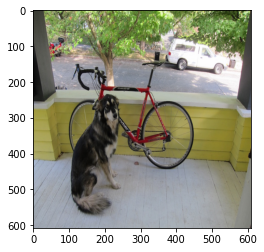

In [5]:
imgfile = './data/dog.jpg'
img = cv2.imread(imgfile)
print(img.shape)
sized = cv2.resize(img, (m.width, m.height))
sized = cv2.cvtColor(sized, cv2.COLOR_BGR2RGB)

print(sized.shape)
plt.imshow(sized)
plt.show()

In [6]:
use_cuda = 1
if use_cuda:
    m.cuda()

In [7]:
input_img = torch.from_numpy(sized.transpose(2, 0, 1)).float().div(255.0).unsqueeze(0)
input_img = input_img.cuda()

In [8]:
boxes = do_detect(m, input_img, conf_thresh=0.4, nms_thresh=0.6, use_cuda=use_cuda)

input shape :  torch.Size([1, 3, 608, 608])
model output shape :  torch.Size([1, 22743, 1, 4])
-----------------------------------
           Preprocess : 0.000061
      Model Inference : 0.698099
-----------------------------------
-----------------------------------
       max and argmax : 0.007889
                  nms : 0.000833
Post processing total : 0.008722
-----------------------------------


In [9]:
boxes

[[[0.14903378, 0.22121671, 0.74544024, 0.74030805, 0.923744, 0.923744, 1],
  [0.6038546, 0.13285464, 0.8914515, 0.29499412, 0.9179137, 0.9179137, 7],
  [0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]]]

(x1, y1, x2, y2, conf, conf, category_id)
```py
x1 = int(box[0] * width)
y1 = int(box[1] * height)
x2 = int(box[2] * width)
y2 = int(box[3] * height)
```

In [10]:
import torch

In [11]:
torch.tensor(boxes[0]).shape

torch.Size([3, 7])

In [12]:
boxes

[[[0.14903378, 0.22121671, 0.74544024, 0.74030805, 0.923744, 0.923744, 1],
  [0.6038546, 0.13285464, 0.8914515, 0.29499412, 0.9179137, 0.9179137, 7],
  [0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]]]

In [13]:
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

In [14]:
output = plot_boxes_cv2(img, boxes[0], savename=None, class_names=class_names)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

bicycle: 0.923744
truck: 0.917914
dog: 0.979061


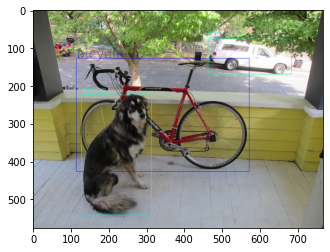

In [15]:
plt.imshow(output)
plt.show()

(576, 768, 3)
[0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]
128 224 313 541


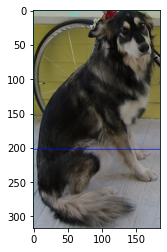

In [16]:
print(img.shape)
height, width, _ = img.shape
box = boxes[0][2]

x1 = int(box[0] * width)
y1 = int(box[1] * height)
x2 = int(box[2] * width)
y2 = int(box[3] * height)

print(box)
print(x1, y1, x2, y2)
plt.imshow(output[y1:y2, x1:x2, :])
plt.show()

In [17]:
x1, y1, x2, y2

(128, 224, 313, 541)

In [18]:
import tool.config as tools
block = tools.parse_cfg('./cfg/yolov4.cfg')
block

[{'type': 'net',
  'batch': '64',
  'subdivisions': '8',
  'width': '608',
  'height': '608',
  'channels': '3',
  'momentum': '0.949',
  'decay': '0.0005',
  'angle': '0',
  'saturation': '1.5',
  'exposure': '1.5',
  'hue': '.1',
  'learning_rate': '0.0013',
  'burn_in': '1000',
  'max_batches': '500500',
  'policy': 'steps',
  'steps': '400000,450000',
  'scales': '.1,.1',
  'mosaic': '1'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '32',
  'size': '3',
  'stride': '1',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '3',
  'stride': '2',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '1',
  'stride': '1',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'route', 'layers': '-2'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '1',
  'stride': '1',
  'pad': '1',
  'activation': 'mis

# COCO

In [19]:
from pycocotools.coco import COCO
from torch.utils.data import DataLoader
from dataset_coco import COCOImage

anno_json = './../MSCOCO_ObjDet_Detail/new_coco/annotations/new_anno.json'
img_path = './../MSCOCO_ObjDet_Detail/new_coco/images/'

anno = COCO(anno_json)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [20]:
img_ids = anno.getImgIds()

In [21]:
from dataset_coco import COCOImage

In [22]:
val_set = COCOImage(anno_json, img_path, 608)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [23]:
val_loader = DataLoader(val_set, 4, shuffle=True, num_workers=0)

In [24]:
imgs, img_ids, sizes = iter(val_loader).__next__()

In [25]:
boxes = do_detect(m, imgs, conf_thresh=0.4, nms_thresh=0.6, use_cuda=use_cuda)

input shape :  torch.Size([4, 3, 608, 608])
model output shape :  torch.Size([4, 22743, 1, 4])
-----------------------------------
           Preprocess : 0.001629
      Model Inference : 0.217608
-----------------------------------
-----------------------------------
       max and argmax : 0.053097
                  nms : 0.003270
Post processing total : 0.056366
-----------------------------------


In [26]:
(h0, w0) = (sizes[0][3].item(), sizes[1][3].item())

In [27]:
origin_img = val_set.get_img(img_ids[3].item())
output = plot_boxes_cv2(origin_img, boxes[3], savename=None, class_names=class_names)

person: 0.990986
bird: 0.986897
bird: 0.981140
bird: 0.973802
handbag: 0.471834


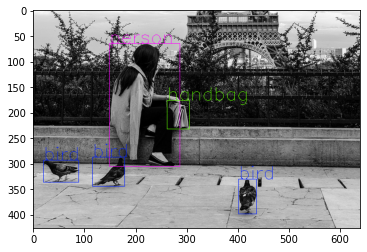

In [28]:
plt.imshow(output)

# boxes to json

In [29]:
# imgs, img_ids, sizes = iter(val_loader).__next__()

In [30]:
img_ids.numpy()

array([142092,  80671, 514508, 456496])

In [31]:
sizes[0].numpy()
sizes[1].numpy()

array([640, 640, 640, 640])

In [32]:
list(zip(img_ids.numpy(), boxes, sizes[0].numpy(), sizes[1].numpy()))[0]

(142092,
 [[0.8545335, -0.0014805272, 1.0018895, 0.20180652, 0.4215372, 0.4215372, 41],
  [0.18999544, 0.08457595, 0.8256738, 0.82624197, 0.8229458, 0.8229458, 53]],
 480,
 640)

## boxes to dict

In [33]:
from tqdm import tqdm

In [34]:
result_dict = dict([])
for imgs, img_ids, sizes in tqdm(val_loader):
    # model
    boxes = do_detect(m, imgs, conf_thresh=0.4, nms_thresh=0.6, use_cuda=use_cuda, verbose=False)
    # process
    
    for img_id, box, H, W in zip(img_ids.numpy(), boxes, sizes[0].numpy(), sizes[1].numpy()):
        result_dict[img_id] = (img_id, box, H, W)

100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


In [35]:
result_dict.keys()

dict_keys([322864, 370677, 25560, 37777, 181666, 438862, 565778, 511321, 297343, 104612, 122745, 491497, 289393, 109798, 486438, 476258, 356427, 403817, 226111, 369370, 502136, 142092, 321214, 474028, 180135, 515445, 35197, 562121, 16228, 153299, 349860, 463730, 522713, 460347, 301867, 270244, 403385, 143931, 348881, 314294, 180560, 238866, 85329, 418281, 400573, 206027, 456496, 458054, 331352, 125211, 228144, 219578, 502737, 448365, 473237, 185250, 184791, 577539, 87038, 347693, 360661, 329323, 514508, 303818, 41888, 239274, 355257, 397133, 572517, 199551, 266409, 430961, 6818, 173383, 312421, 286994, 184321, 252219, 516316, 17627, 336587, 58636, 80671, 233771, 500663, 63154, 480985, 39956, 239347, 443303, 555705, 515579, 386912, 308394, 78915, 174482, 382088, 475779, 296649, 66523])

In [36]:
result_dict[122745]

(122745,
 [[0.44159022,
   0.17419697,
   0.74414265,
   0.39047128,
   0.99971217,
   0.99971217,
   11]],
 640,
 480)

## dict to json

In [37]:
import json

In [38]:
def coco_format(result):
    coco_pred = []
    img_id, boxes, H, W = result
    for box in boxes:
        x1, y1, x2, y2, conf, conf, category_id = box
        
        x1 = x1 * W
        y1 = y1 * H
        
        x2 = x2 * W
        y2 = y2 * H
        
        widht = int(x2 - x1)
        height = int(y2 - y1)
        x, y = int(x1), int(y1)
        
        pred_out = {
            "image_id": int(img_id),
            "category_id": int(category_id),
#             "bbox": [x,y,width,height, int(x1), int(x2), int(y1), int(y2)],
            "bbox": [x,y,width,height],
            "score": float(conf),            
        }
        
        coco_pred.append(pred_out)
    return coco_pred

In [39]:
total = []
for img_id in tqdm(result_dict.keys()):
    one_result = coco_format(result_dict[img_id])
    total.extend(one_result)

100%|██████████| 100/100 [00:00<00:00, 10688.85it/s]


In [40]:
total

[{'image_id': 322864,
  'category_id': 0,
  'bbox': [286, 336, 768, 27],
  'score': 0.8872630000114441},
 {'image_id': 322864,
  'category_id': 2,
  'bbox': [289, 351, 768, 42],
  'score': 0.9630264639854431},
 {'image_id': 322864,
  'category_id': 2,
  'bbox': [11, 350, 768, 48],
  'score': 0.8400360345840454},
 {'image_id': 322864,
  'category_id': 2,
  'bbox': [0, 353, 768, 74],
  'score': 0.7327545285224915},
 {'image_id': 322864,
  'category_id': 2,
  'bbox': [48, 333, 768, 62],
  'score': 0.5870965123176575},
 {'image_id': 322864,
  'category_id': 2,
  'bbox': [1, 379, 768, 219],
  'score': 0.5503188967704773},
 {'image_id': 322864,
  'category_id': 7,
  'bbox': [313, 305, 768, 151],
  'score': 0.5571151971817017},
 {'image_id': 370677,
  'category_id': 0,
  'bbox': [0, 59, 768, 271],
  'score': 0.9908750057220459},
 {'image_id': 370677,
  'category_id': 0,
  'bbox': [347, 110, 768, 221],
  'score': 0.9721295833587646},
 {'image_id': 370677,
  'category_id': 0,
  'bbox': [157, 93

In [41]:
with open('./../YOLOv4_pred.josn', 'w')as f:
    json.dump(total, f)

# eval test

In [42]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [43]:
anno_json = './../MSCOCO_ObjDet_Detail/new_coco/annotations/new_anno.json'
pred_json = './../YOLOv4_pred.josn'

anno = COCO(anno_json)
pred = anno.loadRes(pred_json)  # init predictions api
eval = COCOeval(anno, pred, 'bbox')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


In [44]:
eval.evaluate()
eval.accumulate()
eval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

# debug

{'image_id': 322864, 'category_id': 2, 'bbox': [0, 353, 768, 74], 'score': 0.7327545285224915}


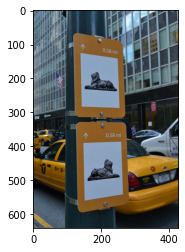

{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}


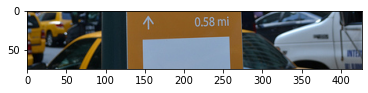

In [71]:
test_img = total[3]
print(test_img)

origin_img = val_set.get_img(test_img['image_id'])
plt.imshow(origin_img)
plt.show()

x,y,w,h = test_img['bbox']
print(anno.cats[test_img['category_id']])
plt.imshow(origin_img[y:y+h, x:x+w])
plt.show()

In [49]:
a = result_dict[16228]
a

(16228,
 [[0.31355348, 0.43510622, 0.3738772, 0.67086464, 0.89340496, 0.89340496, 0],
  [0.4958182, 0.39893597, 0.5432597, 0.5254805, 0.79344445, 0.79344445, 0],
  [0.8517082, 0.37399206, 0.89211667, 0.44534212, 0.7607726, 0.7607726, 0],
  [0.7615414, 0.49610457, 0.84788513, 0.64005506, 0.7440653, 0.7440653, 0],
  [0.18059224, 0.44419947, 0.20490688, 0.58407795, 0.7395494, 0.7395494, 0],
  [0.12241363, 0.44903353, 0.16077231, 0.5938314, 0.72811705, 0.72811705, 0],
  [0.051849194, 0.46134567, 0.08416738, 0.59916663, 0.6559822, 0.6559822, 0],
  [0.104539014, 0.46379662, 0.1234045, 0.595114, 0.6539183, 0.6539183, 0],
  [0.82372844, 0.38305762, 0.8565062, 0.45411292, 0.59136534, 0.59136534, 0],
  [0.16114923, 0.44837973, 0.1840516, 0.5730544, 0.44489905, 0.44489905, 0],
  [0.13748555, 0.45274687, 0.1657144, 0.5866989, 0.40904915, 0.40904915, 0],
  [0.24477597, 0.44726208, 0.26258183, 0.49669445, 0.40163636, 0.40163636, 0],
  [0.80581987, 0.5285747, 0.97206134, 0.66292906, 0.95446503, 0.954

In [50]:
x1, y1, x2, y2, conf, conf, cid = a[1][0]

H = 440
W = 640
x1 = x1 * W
y1 = y1 * H
x2 = x2 * W
y2 = y2 * H
width = int(x2 - x1)
height = int(y2 - y1)
x, y = int(x1), int(y1)

x1, y1 ,x2, y2 = map(int, (x1, y1, x2, y2))

In [51]:
x1, y1 ,x2 ,y2

(200, 191, 239, 295)

In [52]:
width, height

(38, 103)